# PreProcessing Data

Loading the data: It loads test and training datasets from CSV files.

Removing missing values: It replaces missing values (denoted as '-') with NaN and then removes any rows containing NaN values in both training and test data.
    
Handling categorical mismatches: It ensures that only the categories present in both the training and test datasets are kept. This addresses the issue where the categorical values in the training data may not exactly match those in the test data.

In [226]:
import pandas as pd
import numpy as np 

#Load data from the provided csv's
test_data = pd.read_csv('cyber-data/UNSW_NB15_testing-set.csv')
train_data = pd.read_csv('cyber-data/UNSW_NB15_training-set.csv')

#Drop attack category
test_data.drop('attack_cat', axis=1, inplace=True)
train_data.drop('attack_cat', axis=1, inplace=True)

#This combines the data in order to make sure the column names are the same, and then it gets the list of columns to iterate over
combined_data = pd.concat([train_data, test_data])
cols = list(combined_data)

#This would get rid of all the empty values by replacing them with nulls, then dropping them using np.nan. However we decided to not treat the dashes as nulls because almost all of the data has them
# for col in cols:
#     train_data[col].replace('-', np.nan, inplace=True)
#     train_data.dropna(subset=[col], inplace=True)
#     test_data[col].replace('-', np.nan, inplace=True)
#     test_data.dropna(subset=[col], inplace=True)

# #This iterates over all the columns and only saves the categorical values that are in both datasets
for col in cols:
    train_data = train_data[train_data[col].isin(test_data[col])]
    test_data = test_data[test_data[col].isin(train_data[col])]

display(train_data)
display(test_data)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.00130,...,1,1,4,0,0,0,2,1,0,0
36,37,0.000015,udp,-,INT,2,0,168,0,66666.66835,...,1,1,3,0,0,0,1,3,0,0
42,43,0.000008,udp,-,INT,2,0,168,0,125000.00030,...,1,1,1,0,0,0,1,2,0,0
49,50,0.000010,udp,-,INT,2,0,168,0,100000.00250,...,1,1,2,0,0,0,1,3,0,0
54,55,0.000024,udp,-,INT,2,0,168,0,41666.66519,...,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82325,82326,0.000009,any,-,INT,2,0,200,0,111111.10720,...,3,3,13,0,0,0,5,9,0,1
82326,82327,0.000005,unas,-,INT,2,0,200,0,200000.00510,...,3,3,14,0,0,0,3,11,0,1
82327,82328,0.000003,cftp,-,INT,2,0,200,0,333333.32150,...,3,3,13,0,0,0,5,9,0,1
82329,82330,0.000009,udp,-,INT,2,0,168,0,111111.10720,...,1,1,20,0,0,0,20,1,0,1


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,2,1,3,0,0,0,2,3,0,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
10,11,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
11,12,0.000000,arp,-,INT,1,0,46,0,0.0000,...,2,2,2,0,0,0,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82326,82327,0.000009,udp,-,INT,2,0,104,0,111111.1072,...,1,1,1,0,0,0,1,1,0,0
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.0051,...,1,1,2,0,0,0,2,1,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.0000,...,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.0000,...,1,1,1,0,0,0,1,1,1,0


# Encoding Categorical Features and Normalizing Numeric Features

This script uses OneHotEncoder to convert categorical columns to a format that can be provided to machine learning algorithms, and StandardScaler to normalize the numeric columns.

In [227]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numeric columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
numeric_cols = train_data.select_dtypes(include=['number']).columns

# Create transformers for categorical and numeric data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

# Apply transformations to both training and testing data
train_data_preprocessed = preprocessor.fit_transform(train_data)
test_data_preprocessed = preprocessor.transform(test_data)

### Model One
    Fully-Connected Neural Networks (TensorFlow)
    Activation Function: relu
    Layers/Count: 64/32
    Optimizer: adam

In [228]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[train_data_preprocessed.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 2s 2ms/step - loss: 0.0973 - accuracy: 0.9839 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2/50
113/578 [====>.........................] - ETA: 0s - loss: 0.0044 - accuracy: 0.9997    

c:\Users\JALENS~1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9995 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9988 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 6/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9994 - val_loss: 4.1024e-04 - val_accuracy: 1.0000
Epoch 7/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.0061 - val_accuracy: 0.9991
Epoch 8/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 3.9726e-06 - val_accuracy: 1.0000
Epoch 9/5

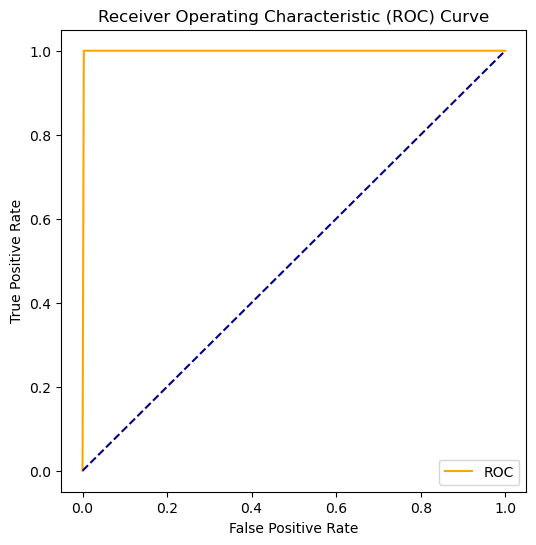

Confusion Matrix:
[[ 7533    23]
 [    0 13499]]
Accuracy: 0.9989
Precision: 0.9983
Recall: 1.0000
F1-Score: 0.9991


In [229]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Two
    Fully-Connected Neural Networks (TensorFlow)
    Activation Function: tanh
    Layers/Count: 64/32
    Optimizer: sgd

In [230]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='tanh', input_shape=[train_data_preprocessed.shape[1]]),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 2s 2ms/step - loss: 0.0855 - accuracy: 0.9866 - val_loss: 0.0957 - val_accuracy: 0.9323
Epoch 2/50
124/578 [=====>........................] - ETA: 0s - loss: 0.0060 - accuracy: 0.9992

c:\Users\JALENS~1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 1ms/step - loss: 0.0040 - accuracy: 0.9997 - val_loss: 0.0883 - val_accuracy: 0.9390
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.0715 - val_accuracy: 0.9585
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9665
Epoch 5/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9710
Epoch 6/50
578/578 [==============================] - 1s 1ms/step - loss: 8.1115e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9825
Epoch 7/50
578/578 [==============================] - 1s 1ms/step - loss: 6.4612e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9836
Epoch 8/50
578/578 [==============================] - 1s 2ms/step - loss: 5.4810e-04 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch

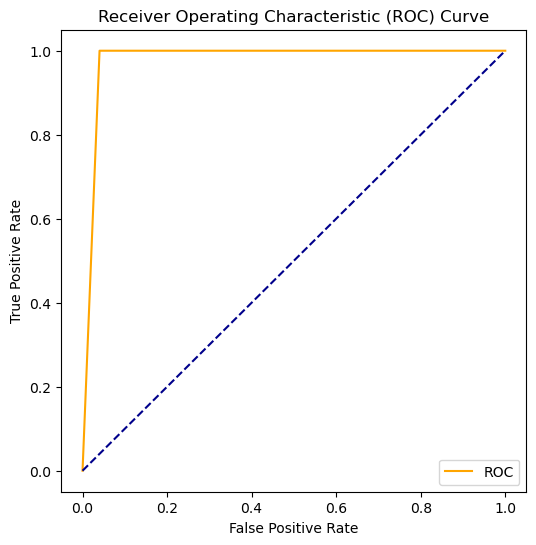

Confusion Matrix:
[[ 7252   304]
 [    0 13499]]
Accuracy: 0.9856
Precision: 0.9780
Recall: 1.0000
F1-Score: 0.9889


In [231]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Three
    Convolutional Neural Networks (TensorFlow)
    Activation Function: relu
    Layers/Count: 16
    Optimizer: adam

In [232]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16, 3, activation='relu', input_shape=(train_data_preprocessed.shape[1],1)),
    tf.keras.layers.MaxPooling1D(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 2s 3ms/step - loss: 0.0647 - accuracy: 0.9739 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 2/50
 73/578 [==>...........................] - ETA: 1s - loss: 0.0019 - accuracy: 1.0000

c:\Users\JALENS~1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 2ms/step - loss: 6.5914e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 3.9907e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 6.7195e-06 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/50
578/578 [==============================] - 1s 2ms/step - loss: 3.0869e-06 - accuracy: 1.0000 - val_loss: 2.5816e-04 - val_accuracy: 1.0000
Epoch 6/50
578/578 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5822e-04 - val_accuracy: 1.0000
Epoch 7/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5822e-04 - val_accuracy: 1.0000
Epoch 8/50
578/578 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.5822e

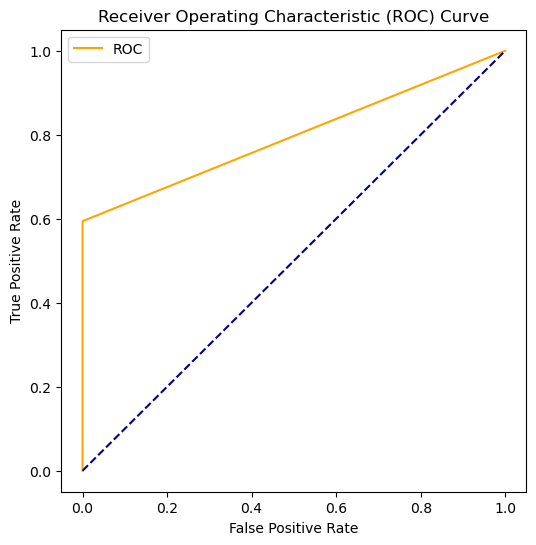

Confusion Matrix:
[[7556    0]
 [5478 8021]]
Accuracy: 0.7398
Precision: 1.0000
Recall: 0.5942
F1-Score: 0.7454


In [233]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Four
    Convolutional Neural Networks (TensorFlow)
    Activation Function: tanh
    Layers/Count: 16
    Optimizer: sgd

In [234]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16, 3, activation='tanh', input_shape=(train_data_preprocessed.shape[1],1)),
    tf.keras.layers.MaxPooling1D(1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='tanh')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Setup EarlyStopping and ModelCheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Epoch 1/50
578/578 [==============================] - 2s 3ms/step - loss: 0.1604 - accuracy: 0.9726 - val_loss: 0.0975 - val_accuracy: 0.9330
Epoch 2/50
 57/578 [=>............................] - ETA: 0s - loss: 0.0247 - accuracy: 0.9951

c:\Users\JALENS~1\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


578/578 [==============================] - 1s 3ms/step - loss: 0.0114 - accuracy: 0.9991 - val_loss: 0.0746 - val_accuracy: 0.9546
Epoch 3/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.0702 - val_accuracy: 0.9604
Epoch 4/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 0.0639 - val_accuracy: 0.9665
Epoch 5/50
578/578 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0652 - val_accuracy: 0.9654
Epoch 6/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 0.0626 - val_accuracy: 0.9676
Epoch 7/50
578/578 [==============================] - 2s 3ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0615 - val_accuracy: 0.9680
Epoch 8/50
578/578 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0529 - val_accuracy: 0.9799
Epoch 9/50
578/57

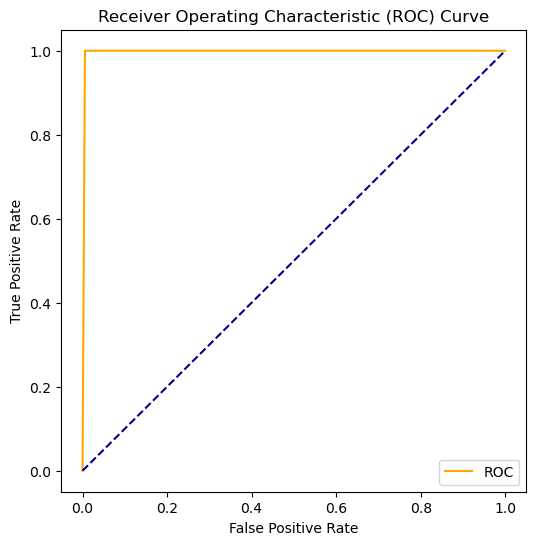

Confusion Matrix:
[[ 7513    43]
 [    0 13499]]
Accuracy: 0.9980
Precision: 0.9968
Recall: 1.0000
F1-Score: 0.9984


In [235]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Five
    Logistic Regression (scikit-learn)

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = LogisticRegression()

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


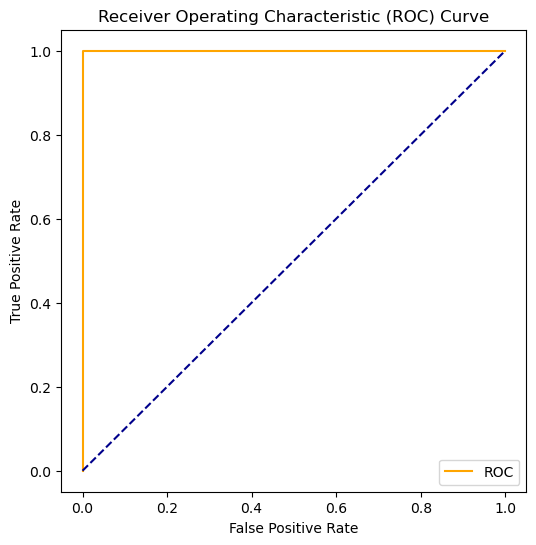

Confusion Matrix:
[[ 7556     0]
 [    0 13499]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [237]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")

### Model Six
    Support Vector Machine (scikit-learn)

In [238]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Define a simple neural network model
model = SVC(kernel='linear')

#convert data to dense matrix so it works with the model training
dense_array = train_data_preprocessed.toarray()
train_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)
dense_array = test_data_preprocessed.toarray()
test_data_preprocessed_dense = tf.convert_to_tensor(dense_array, dtype=tf.float32)

#convert data to array so it works with the model training
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])


# Train the model
history = model.fit(
    train_data_preprocessed_dense, 
    train_labels,  # 'label' is the target variable
)
predictions = model.predict(test_data_preprocessed_dense)
rmse = sqrt(mean_squared_error(test_labels, predictions))
mae = mean_absolute_error(test_labels, predictions)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


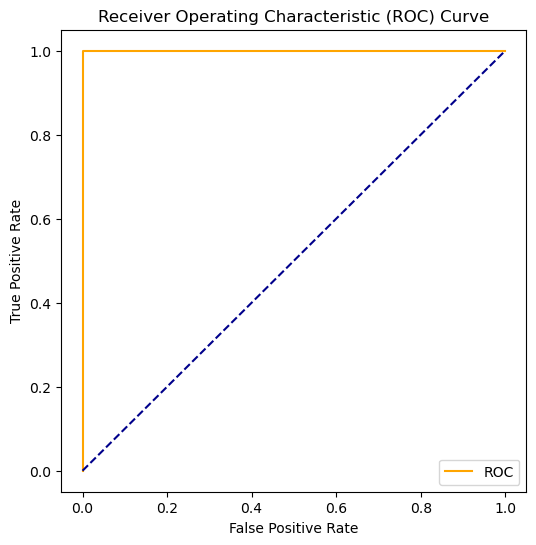

Confusion Matrix:
[[ 7556     0]
 [    0 13499]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [239]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Flatten predicitions
predictions_flat = predictions.flatten()

#Evaluate with a confusion matrix and an accuracy and precision score
conf_matrix = confusion_matrix(test_labels, (predictions_flat >= 0.5).astype(int))
accuracy = accuracy_score(test_labels, (predictions_flat >= 0.5).astype(int))
precision = precision_score(test_labels, (predictions_flat >= 0.5).astype(int))
recall = recall_score(test_labels, (predictions_flat >= 0.5))
f1score = f1_score(test_labels, (predictions_flat >= 0.5))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_data['label'], (predictions_flat >= 0.5).astype(int))

#Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1score:.4f}")